In [4]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as math

In [5]:
time_period = 20 # look back period
history = [] # history of prices
sma_values = [] # to track moving average values for visualization purposes
stddev_values = [] #

In [6]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="40d")

In [7]:
for close_price in sbi['Close']:
    history.append(close_price)
    if len(history) > time_period:
        del (history[0])
    sma = stats.mean(history)
    sma_values.append(sma)
    variance = 0
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    stdev = math.sqrt(variance / len(history))
    stddev_values.append(stdev)

In [10]:
sbi['stdev'] = pd.Series(stddev_values, index = sbi.index)

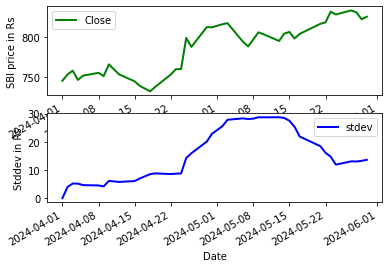

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='SBI price in Rs')
sbi['Close'].plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in Rs')
sbi['stdev'].plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()